# Logistic Regression
A Jupyter Notebook for demonstrating the Logistic Regression model for diagnostically predicting whether or not a patient has diabetes, based on certain diagnostic measurements included in the Pima Indians Diabetes Database.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Based on the medical predictor variable inputs, the LR model predicts whether the patient has diabeties (1) or not (0).

For more details, please refer to https://www.kaggle.com/uciml/pima-indians-diabetes-database.

In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve
import seaborn as sns

In [2]:
# set default Seaborn theme
sns.set_theme()

### Dataset Setup

In [3]:
# read dataset from locally downloaded file: https://www.kaggle.com/uciml/pima-indians-diabetes-database

# column names
COLUMN_NAMES = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Read dataset to pandas dataframe.
dataset = pd.read_csv('./diabetes.csv', header='infer')

# verify loaded dataset
print('Loaded dataset in Pandas Dataframe:\n')
dataset.info()

Loaded dataset in Pandas Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print('Sample entries in dataset')
# first 5 entries
dataset.head(n=5)

Sample entries in dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# dataset statistics 
def classwise_means(df):
    """Prints classwise averages for attributes present in the dataset (df)."""
    print('Classes in dataset: ')
    class_labels = df['Outcome'].unique()
    print(class_labels)
    print('\n')
    print('Class-wise Attribute Averages')
    print(df.groupby(['Outcome']).mean())

classwise_means(dataset)

Classes in dataset: 
[1 0]


Class-wise Attribute Averages
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


In [6]:
# class counts
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

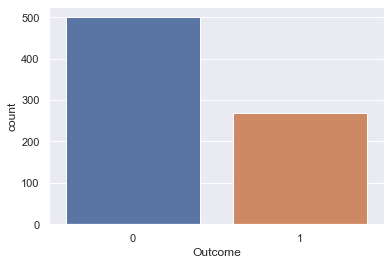

In [7]:
sns.countplot(x='Outcome', data=dataset)
plt.show()

### Dataset Preprocessing

In [8]:
# first 8 columns correspond to features, 9th column contains the class labels

X = dataset.iloc[:, :8].values
Y = dataset.iloc[:, 8].values

In [9]:
# Train-Test split

# Following an 80-20 split on data.
# The dataset is shuffled with 99 as the random seed for reproducible results.
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=99, test_size=0.20)

print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  614
Number of test samples:  154


In [10]:
# Feature normalization
# Refer to https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Training and Predictions

#### Logistic Regression classification

In the Logistic Regression model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. 

The standard logistic function is given as:
$$
f(x)=\frac{1}{1+e^{-x}}=\frac{e^{x}}{e^{x}+1}
$$

Thus, for the logistic regression model:

$$
P\left(y=1\right)=\frac{1}{1+\exp \left(-{w}^{\top} {x}\right)}
$$

In [11]:
# Fit model to training data
classifier = LogisticRegression(penalty='l2', tol=1e-6, max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000, tol=1e-06)

In [12]:
# Evaluate on test data 
y_pred = classifier.predict(X_test)

### Model Performance 

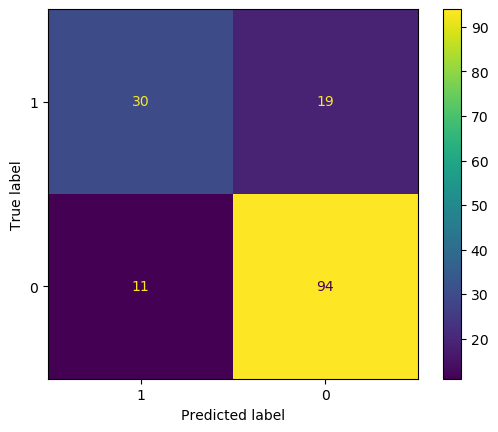

In [13]:
# Confusion Matrix
class_labels = dataset['Outcome'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
# switch off Seaborn theme for CM plot
sns.reset_orig()
disp.plot()

In [14]:
# Performance Statistics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.73      0.61      0.67        49

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



## Understanding the results

The model is able to achieve 81% classification accuracy on the test set (20% split) consisting of 154 examples. This means that the Logistic Regresssion model was able to correctly predict the Outcome (both positive/negative) for 124/154 test examples. From the confusion matrix above, we can observe that there are 19 false negatives, where the model diagnosed a patient as non-diabetic, while the correct diagnosis should have been diabetic. We should keep these metrics in mind when deploying machine learning algorithms for safety & mission-critical applications(http://helper.ipam.ucla.edu/publications/lco2020/lco2020_16454.pdf).

### ROC and PR Curves

When evaluating binary decision problems, one should use Receiver Operator Characteristic (ROC) curves, which show how the number of correctly classified positive examples varies with the number of incorrectly classified negative examples. However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution.

Precision-Recall (PR) curves, often used in Information Retrieval, have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution.

In ROC space, one plots the False Positive Rate (FPR) on the x-axis and the True Positive Rate (TPR) on the y-axis. The FPR measures the fraction of negative examples that are misclassified as positive. The TPR measures the fraction of positive examples that are correctly labeled. In PR space, one plots Recall on the x-axis and Precision on the y-axis. Recall is the same as TPR, whereas Precision measures that fraction of examples classified as positive that are truly positive.

For more details, please refer to https://dl.acm.org/doi/10.1145/1143844.1143874 (ICML 2006).

In [15]:
# switch to default Seaborn theme
sns.set_theme()

def plot_curve(y1, x1, y2, x2, y_label,  x_label, y1_label, y2_label, title):
    """For plotting metrics of 2 models"""
    plt.figure()
    plt.plot(x1, y1, label=y1_label)
    if not (x2 is None or y2 is None or y2_label is None):
        plt.plot(x2, y2, label=y2_label, linestyle='--')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

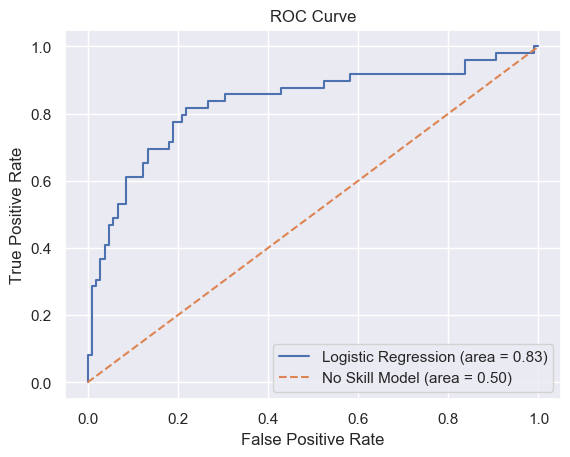

In [16]:
# ROC curve

# get probabilities of test sample being labelled as positive (1) from the LR model.
lr_probs = classifier.predict_proba(X_test)[:, 1]

# get roc curve vectors for plotting
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# Compare with baseline 'No Skill' model which returns prob = 0 for all samples
ns_probs = [0.] * len(lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Area under ROC curve
lr_auc_roc = roc_auc_score(y_test, lr_probs)

# plot AUC
plot_curve(y1=tpr,
           x1=fpr,
           y2=ns_tpr,
           x2=ns_fpr,
           y_label='True Positive Rate',
           x_label='False Positive Rate',
           y1_label='Logistic Regression (area = %0.2f)' % lr_auc_roc,
           y2_label='No Skill Model (area = %0.2f)' % 0.5,
           title='ROC Curve')


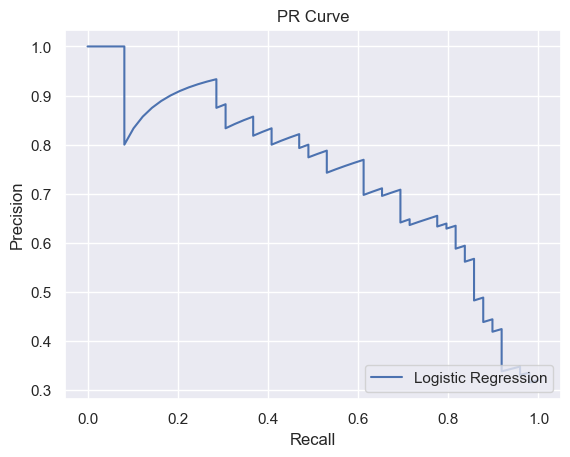

In [17]:
# PR Curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

# plot PR curve
plot_curve(y1=lr_precision,
           x1=lr_recall,
           y2=None,
           x2=None,
           y_label='Precision',
           x_label='Recall',
           y1_label='Logistic Regression',
           y2_label=None,
           title='PR Curve')